# Ordinary differential equations


## Introduction 

Engineering systems are often represented as differential equations. ``sympy`` has robust support for the following types of ordinary differential equations (ODEs):

- 1st order separable differential equations
- 1st order differential equations whose coefficients or dx and dy are functions homogeneous of the same order.
- 1st order exact differential equations.
- 1st order linear differential equations
- 1st order Bernoulli differential equations.
- 2nd order Liouville differential equations.
- nth order linear homogeneous differential equation with constant coefficients.
- nth order linear inhomogeneous differential equation with constant coefficients using the method of undetermined coefficients.
- nth order linear inhomogeneous differential equation with constant coefficients using the method of variation of parameters.

In addition to ODE support, sympy can even solve separable (either multiplicative or additive) partial differential equations (PDEs).

The main functionality for ODE solving in sympy is the ``sympy.dsolve`` function. The call signature for this function is ``sympy.dsolve(eq, goal, **kwargs)``, where ``eq`` is the differential equation, ``goal`` is the function you want to end up with, and ``**kwargs`` is a placeholder for other arguments that could be passed to the function to help it out a bit. For more detail on what ``**kwargs`` could be, see the documentation.

In [1]:
from sympy import *

In [2]:
init_session()
plt.style.use(u"seaborn-notebook")

IPython console for SymPy 1.0 (Python 2.7.13-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


To solve differential equations, use dsolve. First, create an undefined function by passing cls=Function to the symbols function.

In [3]:
f, g = symbols('f g', cls=Function)

Derivatives of f(x) are unevaluated.

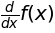

In [4]:
f(x).diff(x)

To represent the differential equation $f′′(x)−2f′(x)+f(x)=sin(x)$, we would use

In [5]:
ode = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))

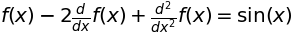

In [6]:
ode

To solve the ODE, pass it and the function to solve for to ``dsolve``.

In [7]:
sol = dsolve(ode, f(x))
display(sol)

``dsolve`` returns an instance of ``Eq``. This is because in general, solutions to differential equations cannot be solved explicitly for the function.

In [8]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))

The arbitrary constants in the solutions from ``dsolve`` are symbols of the form $C_1, C_2, C_3$, and so on.

## Applying Boundary conditions

This isn't implemented yet in ``dsolve`` stable version, but it will be available in the next release (probably!).

For now, solve for contants on your own. For example, if

$$f(0)=1\quad \left.\frac{d f}{d x}\right\vert_{x=0}=0,$$

solve the following equations:

In [9]:
constants = solve([sol.rhs.subs(x,0) - 1, sol.rhs.diff(x,1).subs(x,0)- 0])
constants

In [10]:
C1, C2 = symbols('C1,C2')
sol = sol.subs(constants)
sol

## Systems of equations

In [11]:
g1, g2 = symbols('g1 g2', cls=Function)

In [12]:
eq1 = g1(x).diff(x) - 2*g1(x) - g2(x)
eq2 = g2(x).diff(x) - 3*g1(x) - 4*g2(x)

In [13]:
dsolve((eq1, eq2), fun=(g1(x), g2(x)))


## Vector field

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The '''Lotka–Volterra equations''', also known as the '''predator&ndash;prey equations''', are a pair of first-order, nonlinear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

\begin{align}
\frac{dx}{dt} & = \alpha x - \beta x y \\[6pt]
\frac{dy}{dt} & = \delta x y  - \gamma y
\end{align}

where

* $x$ is the number of prey (for example, rabbits);
* $y$ is the number of some predator (for example, foxes);
* $\tfrac{dy}{dt}$ and $\tfrac{dx}{dt}$ represent the growth rates of the two populations over time;
* $t$  represents time; and
* $α, β, γ, δ$ are positive real parameters describing the interaction of the two species.

In [15]:
y, x = np.mgrid[0:2.5:100j, 0:4:100j]

In [16]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1
dxdt = alpha*x - beta*x*y
dydt = delta*x*y - gamma*y
speed = np.sqrt(dxdt**2 + dydt**2)

In the first case we just plot the velocity field.

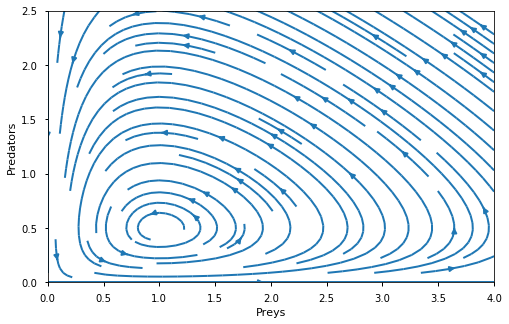

In [17]:
fig0 = plt.figure(figsize=(8,5))
strm = plt.streamplot(x, y, dxdt, dydt, linewidth=2)
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.xlim(0,4)
plt.ylim(0,2.5)

In this example we change the color of the line according to the magnitude of the
_speed_ at each point.

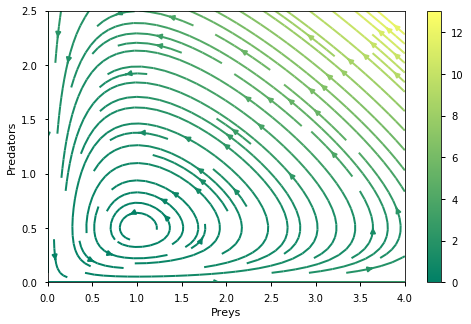

In [18]:
fig1 = plt.figure(figsize=(8,5))
strm = plt.streamplot(x, y, dxdt, dydt, color=speed, linewidth=2, cmap="summer")
plt.colorbar(strm.lines)
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.xlim(0,4)
plt.ylim(0,2.5)

In this case the densities in $x$ and $y$ directions are different.

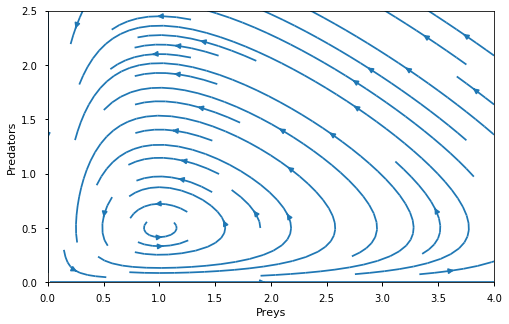

In [19]:
fig2 = plt.figure(figsize=(8,5))
plt.streamplot(x, y, dxdt, dydt, density=[0.5, 1])
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.xlim(0,4)
plt.ylim(0,2.5)

In this last case we vary the width of the lines according to the magnitude
of the _speed_ at each point.

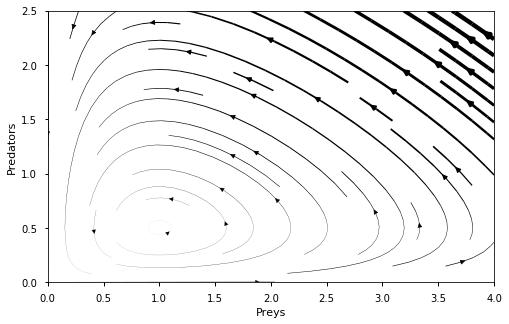

In [20]:
fig3 = plt.figure(figsize=(8,5))
lw = 5*speed / speed.max()
plt.streamplot(x, y, dxdt, dydt, density=0.6, color='k', linewidth=lw)
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.xlim(0,4)
plt.ylim(0,2.5)

## References

1. SymPy Development Team (2016). [Sympy Tutorial: Matrices](http://docs.sympy.org/latest/tutorial/matrices.html)
2. Ivan Savov (2016). [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf)

The following cell change the style of the notebook.

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()